# Codelab PyTorch (intermediate)
## Organizzato da [Italian Association for Machine Learning](http://iaml.it) e [Sourcesense](https://www.sourcesense.com)

## Setup virtual machine

In [0]:
# Ricordate di selezionare Runtime >> Change runtime type >> GPU dalla barra

In [0]:
!pip install torch==1.0.1 torchvision -q

    100% |████████████████████████████████| 560.1MB 33kB/s 
    100% |████████████████████████████████| 2.0MB 5.7MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.46 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.


In [0]:
!pip install fastai==1.0.34 -q

    100% |████████████████████████████████| 143kB 6.9MB/s 
    100% |████████████████████████████████| 1.9MB 15.2MB/s 
    100% |████████████████████████████████| 61kB 22.1MB/s 
    100% |████████████████████████████████| 23.3MB 1.9MB/s 
spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.


In [0]:
!pip install foolbox -q

    100% |████████████████████████████████| 245kB 7.1MB/s 
    100% |████████████████████████████████| 450kB 25.0MB/s 
    100% |████████████████████████████████| 71kB 24.2MB/s 


In [0]:
# Da Runtime >> Restart runtime per risolvere eventuali problemi di PIL

In [0]:
# Caricare il file da: https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset o http://iaml.it/data.zip
from google.colab import files
files.upload()

In [0]:
!unzip data.zip

Archive:  data.zip
replace data.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.zip                


In [0]:
!unzip -q data.zip

In [0]:
!ls train # val

ben_afflek  elton_john	jerry_seinfeld	madonna  mindy_kaling


## Part 1.1 - Load dataset (torchvision.datasets)

In [0]:
from torchvision import datasets
celeb = datasets.ImageFolder('train')

In [0]:
print(len(celeb))
print(celeb[0])

93
(<PIL.Image.Image image mode=RGB size=115x170 at 0x7F100E0D3BE0>, 0)


## Part 1.2 - Transformations on dataset (torchvision.transforms)

In [0]:
# Trasformazione a tensore
from torchvision import transforms
celeb = datasets.ImageFolder('train', transform=transforms.ToTensor())

In [0]:
# Composizione di trasformazioni
tr = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])
celeb = datasets.ImageFolder('train', transform=tr) 

In [0]:
from torch.utils import data
loader = data.DataLoader(celeb, batch_size=16, shuffle=True)

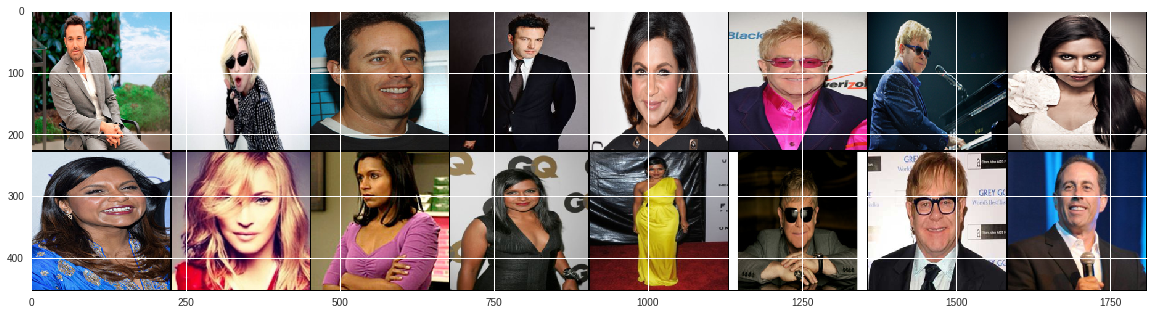

In [0]:
from torchvision import utils
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
xb, yb = next(iter(loader))
out = utils.make_grid(xb)
plt.imshow(out.numpy().transpose((1, 2, 0)))

In [0]:
# Carichiamo la porzione di validazione
celeb_val = datasets.ImageFolder('val', transform=tr)
val_loader = data.DataLoader(celeb_val, batch_size=16)

## Part 1.3 - Get a pretrained model with torchvision.models

In [0]:
# Esempio di modello "fatto a mano"
import torch
from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc = nn.Linear(320, 5)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc(x))
        return F.log_softmax(x, dim=1)

In [0]:
net = Net()
net(xb)

tensor([[-1.6192, -1.6106, -1.5923, -1.6192, -1.6062],
        [-1.6188, -1.6166, -1.5931, -1.6188, -1.6003],
        [-1.6221, -1.6042, -1.5913, -1.6221, -1.6080],
        ...,
        [-1.6184, -1.6067, -1.5877, -1.6184, -1.6164],
        [-1.6189, -1.6072, -1.5863, -1.6189, -1.6164],
        [-1.6194, -1.6104, -1.5848, -1.6194, -1.6135]],
       grad_fn=<LogSoftmaxBackward>)

In [0]:
# Scaricare un modello dal PyTorch zoo
from torchvision import models
net = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.torch/models/alexnet-owt-4df8aa71.pth
244418560it [00:02, 91009763.98it/s]


In [0]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [0]:
net.classifier[-1] = nn.Linear(4096, 5)

In [0]:
def count_parameters(net):
  return sum(p.numel() for p in net.parameters() if p.requires_grad)

In [0]:
print(count_parameters(net))

57024325


In [0]:
for param in net.parameters():
    param.requires_grad = False
net.classifier[-1] = nn.Linear(4096, 5)

In [0]:
print(count_parameters(net))

20485


## Part 1.5 - High-level training with fastai

In [0]:
from fastai.basic_train import DataBunch, Learner
from fastai.metrics import accuracy

In [0]:
learner = Learner(DataBunch(loader, val_loader, val_loader), net.cuda(), loss_func=torch.nn.CrossEntropyLoss(), metrics=[accuracy])

In [0]:
learner.fit(15)

epoch,train_loss,valid_loss,accuracy
1,1.744720,0.974516,0.600000
2,1.146976,0.910648,0.600000
3,0.824234,0.767068,0.640000
4,0.631590,0.743922,0.760000
5,0.504106,0.687861,0.720000
6,0.416572,0.666039,0.760000
7,0.349448,0.676994,0.800000
8,0.304843,0.707572,0.760000
9,0.263607,0.605061,0.720000
10,0.226131,0.510990,0.840000


## Part 1.6 - Put your model in production

In [0]:
xb = xb.cuda()
net = net.eval()

In [0]:
%timeit -n10 -r5 net(xb)

The slowest run took 17.21 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 5: 1.19 ms per loop


In [0]:
net_traced = torch.jit.trace(net, xb)

In [0]:
%timeit -n10 -r5 net_traced(xb)

The slowest run took 18.89 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 5: 890 µs per loop


In [0]:
net_traced.graph_for

<bound method PyCapsule.graph_for of TracedModule[AlexNet](
  (features): TracedModule[Sequential](
    (0): TracedModule[Conv2d]()
    (1): TracedModule[ReLU]()
    (2): TracedModule[MaxPool2d]()
    (3): TracedModule[Conv2d]()
    (4): TracedModule[ReLU]()
    (5): TracedModule[MaxPool2d]()
    (6): TracedModule[Conv2d]()
    (7): TracedModule[ReLU]()
    (8): TracedModule[Conv2d]()
    (9): TracedModule[ReLU]()
    (10): TracedModule[Conv2d]()
    (11): TracedModule[ReLU]()
    (12): TracedModule[MaxPool2d]()
  )
  (classifier): TracedModule[Sequential](
    (0): TracedModule[Dropout]()
    (1): TracedModule[Linear]()
    (2): TracedModule[ReLU]()
    (3): TracedModule[Dropout]()
    (4): TracedModule[Linear]()
    (5): TracedModule[ReLU]()
    (6): TracedModule[Linear]()
  )
)>

In [0]:
# Don't!
# net_traced.classifier[-1] = nn.Linear(4096, 5)

## Part 1.7 - Fooling our network!

Se siete interessati all'argomento: https://blog.openai.com/adversarial-example-research/.

In [0]:
# Estriamo un'immagine
idx = 4
x = xb[idx:idx+1].cpu()

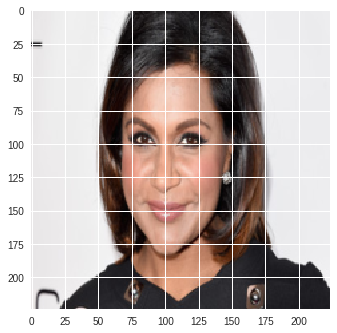

In [0]:
# Visualizziamo
plt.imshow(x[0].numpy().transpose((1,2,0)))

In [0]:
# Predizione della rete
torch.argmax(net.cpu()(x))

tensor(4)

In [0]:
celeb.class_to_idx

{'ben_afflek': 0,
 'elton_john': 1,
 'jerry_seinfeld': 2,
 'madonna': 3,
 'mindy_kaling': 4}

In [0]:
# Importiamo il modello in Foolbox
from foolbox import models
net_f = models.PyTorchModel(net.cpu(), bounds=(0,1), num_classes=5)

In [0]:
# Creiamo un attacco
from foolbox import attacks
attack = attacks.FGSM(net_f)

In [0]:
adversarial = attack(x[0].numpy(), yb[idx].item())

In [0]:
# La predizione è sbagliata!
import numpy as np
np.argmax(net_f.predictions(adversarial))

2

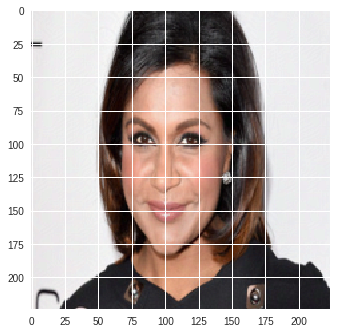

In [0]:
plt.imshow(adversarial.transpose((1,2,0)))